Enter the path to the image:  C:\Users\abhid\Downloads\1722317129314.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Age: 37
Gender: male


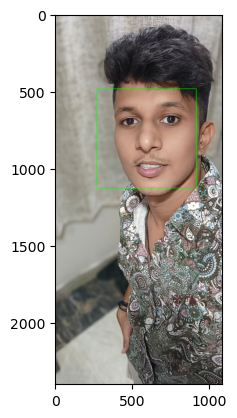

Detected face shape: Oblong
Recommended hairstyles: Buzz Cut, Fringe, Side Part


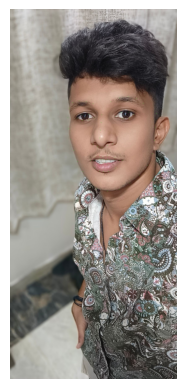

Recommended Hairstyle


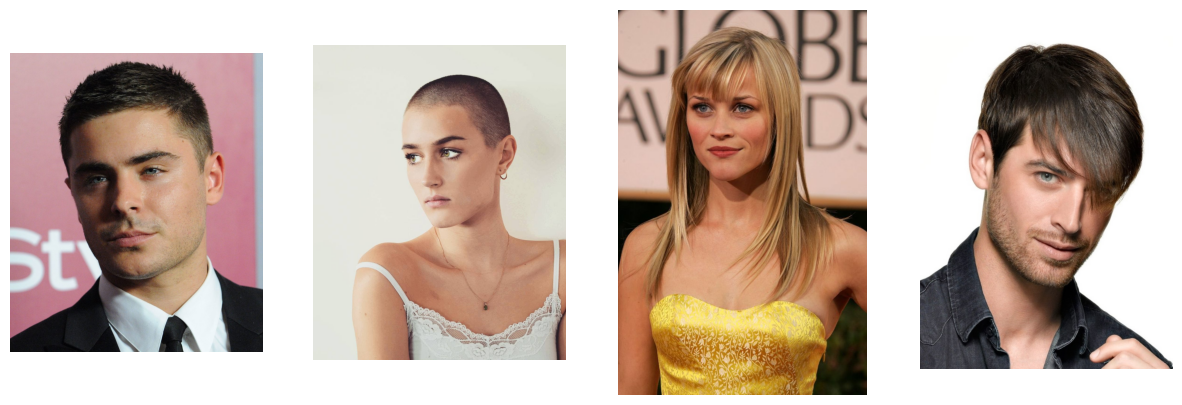

In [3]:
import cv2
import dlib
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load dlib's pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\Users\abhid\Downloads\shape_predictor_68_face_landmarks.dat")

# Load the pre-trained models
age_model = tf.keras.models.load_model('age_model.h5')
gender_model = tf.keras.models.load_model('gender_model.h5')
#face_shape_model=tf.keras.models.load_model('face_shape_model.h5')

# Preprocess the image for model input
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (64, 64))  # Resize to the model's input size
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define functions for age and gender prediction
def predict_age(image):
    age_prediction = age_model.predict(image)
    age = int(age_prediction[0][0])
    '''pred = age_model.predict(image)
    age = np.argmax(pred, axis=1)[0]  # Assuming model outputs one-hot encoded age classes'''
    return age

def predict_gender(image):
    gender_prediction = gender_model.predict(image)
    gender='male' if gender_prediction[0][0] > 0.92 else 'female'
    #'male' if gender_prediction[0][0] > 0.5 else 'female'
    return gender
# Load pre-trained models for face detection and landmark prediction
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(r"C:\Users\abhid\Downloads\shape_predictor_68_face_landmarks.dat")

# Function to detect face and landmarks
def detect_face_and_landmarks(image_path):
    # Try to load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None, None
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) == 0:
        print("No face detected in the image.")
        return None, None

    face = faces[0]
    landmarks = landmark_predictor(gray, face)
    landmarks = [(p.x, p.y) for p in landmarks.parts()]
    landmarks = np.array(landmarks)
    
    return image, landmarks

# Function to determine face shape
def determine_face_shape(landmarks):
    jaw_width = np.linalg.norm(landmarks[0] - landmarks[16])
    face_height = np.linalg.norm(landmarks[8] - landmarks[19])
    face_width = np.linalg.norm(landmarks[1] - landmarks[15])
    
    if jaw_width > face_width and jaw_width > face_height:
        return "Square"
    elif face_height > face_width and face_height > jaw_width:
        return "Oblong"
    elif face_width > face_height and face_width > jaw_width:
        return "Round"
    else:
        return "Oval"

# Function to recommend hairstyles based on face shape
def recommend_hairstyles(face_shape):
    hairstyles = {
        "Square": ["Short Layered", "Textured Crop", "Side Part"],
        "Oblong": ["Buzz Cut", "Fringe", "Side Part"],
        "Round": ["Pompadour", "Undercut", "High Fade"],
        "Oval": ["Slick Back", "Quiff", "Side Part"]
    }
    return hairstyles.get(face_shape, [])

# Function to display example images of recommended hairstyles
def display_hairstyle_examples(face_shape):
    example_images = {
        "Square": [r"C:\Users\abhid\Downloads\1-Medium-Length-Side-Part.jpg",r"C:\Users\abhid\Downloads\texture crop.jpg",r"C:\Users\abhid\Downloads\short haired.jpg",r"C:\Users\abhid\Downloads\side part women.jpeg"],
        "Oblong": [r"C:\Users\abhid\Downloads\buzz cut men.jpg",r"C:\Users\abhid\Downloads\buzz women.jpg",r"C:\Users\abhid\Downloads\fringe women.jpeg",r"C:\Users\abhid\Downloads\fringe men.jpeg"],
        "Round": [r"C:\Users\abhid\Downloads\pompadour-3-blackfishbry.jpg",r"C:\Users\abhid\Downloads\undercut women.jpeg",r"C:\Users\abhid\Downloads\round shape girl.jpeg",r"C:\Users\abhid\Downloads\High-Skin-Fade-35-Best-High-Fade-Haircuts-for-Men.jpg"],
        "Oval": [r"C:\Users\abhid\Downloads\Quiff-Hairstyle.jpg",r"C:\Users\abhid\Downloads\slick black.jpeg",r"C:\Users\abhid\Downloads\side part2.jpeg",r"C:\Users\abhid\Downloads\20-Short-Blonde-Quiff-Hairstyle women.jpg"]
    }
    
    images = example_images.get(face_shape, [])
    if not images:
        print("No example images available for the detected face shape.")
        return

    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[i].imshow(img)
            ax[i].axis('off')
        else:
            print(f"Error: Unable to load image at {img_path}")
    
    plt.show()

# Main function to run the face analysis and hairstyle recommendation
def main():
    image_path = input(r"Enter the path to the image: ")
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = detector(gray)
    
    for face in faces:
        landmarks = predictor(gray, face)
        landmarks_array = np.array([[p.x, p.y] for p in landmarks.parts()])
        
        # Preprocess the image for age and gender prediction
        face_image = preprocess_image(image_path)
        
        # Get age and gender
        age = predict_age(face_image)
        gender = predict_gender(face_image)
        
        
        print(f"Age: {age}")
        print(f"Gender: {gender}")
        
        # Display the image with face rectangle (optional)
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

    
    image, landmarks = detect_face_and_landmarks(image_path)
    
    if image is None or landmarks is None:
        return
    
    face_shape = determine_face_shape(landmarks)
    print(f"Detected face shape: {face_shape}")
    
    recommended_hairstyles = recommend_hairstyles(face_shape)
    print(f"Recommended hairstyles: {', '.join(recommended_hairstyles)}")
    
    
    
    # Display the original image with landmarks
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 1, (0, 255, 0), -1)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("Recommended Hairstyle")
    display_hairstyle_examples(face_shape)

if __name__ == "__main__":
    main()

# Analyze image and provide recommendations
def analyze_face(image_path):
    # Load and process the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = detector(gray)
    
    for face in faces:
        landmarks = predictor(gray, face)
        landmarks_array = np.array([[p.x, p.y] for p in landmarks.parts()])
        
        # Preprocess the image for age and gender prediction
        face_image = preprocess_image(image_path)
        
        # Get age and gender
        age = predict_age(face_image)
        gender = predict_gender(face_image)
        
        
        print(f"Age: {age}")
        print(f"Gender: {gender}")
        
        # Display the image with face rectangle (optional)
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

